# Overview


# Class Discussion

* More of a sub methodology - fall under regression or classification
* It's all about finding patters in temporal data, and making predictioms. 
    * The features are, by their nature, dependent on one another. 
    
Time Series | Not Time Series |
------------|-----------------|
Forecast  the number of new customers next month using historical data | Predict number of new customers each month using sales / marketing activity |
Features = each historical month | observation = month / year |
target = next month | features = previous minth campaign count | 


* We can use linear regression to get predictions over time, but in this case, we do not use any date elements into the model. In time series, it is the only model where time is a factor that is fed into the model. 

*Limitation of Time Series*

* It is very easy to fall to the curse of dimensionality, jsut because time can be a huge features with lots of dimensions, and thus it leads to use having to create individual models for each group or product. 
* We can avoid this by using an ensamble algorithm or to cluster them into smaller patters.


In time series, you can visualize the entire dataset in one line chart. While in regression models, we visualize observations as scatter plot. Features in time series are dependent on time, while in the linear regression models they are completely independent of each other. 

## Vocab

* **Resampling**: Chaninging the frequency of data points
* **Treand**: Long term preogression (increasing or decreasing)
* **Seasonality**: Series is influenced by season falctors. Also know as prediodic series
* **cyclic**: Fluctuations that are not of a fixed period. Duration of fluctiontion might be something like 2 yrs
* **Heteroskedasticity**: Changes in variance over time 
* **Autocorrelation**: Used to detect non randomess in data. It is a correlation coefficient, but instead of between 2 difference variables, it is between the values of the same variable at 2 different times. (Think of the lotery numbers, the loterry number of tomorrow are in no way correlated to the ones to yesturday). 
* **Lag Variable**: Previous time step (yesturday is a lag var to today).

## New Skills:

**Acquisition**: Gather data using a RESTAPI
**Prep**: Working with dates (resample(), asfreq())
**Explore**: Splitting a TS data into train/test
  * `sklearn.model_selection.TimeSeriesSplit`
  * Using date cutoff
    Vis time series data: Plot simple aggregate
    * Rolling aggregate 
    * Customize dateime axis
    * Explore seasonality
    * Merge multiple frequencies into same plot

**Model**: Forcast / predict methods
* Analysing lag
* Last observed value
* Previous cycle


# Acquire

### Definition: 

* Concept of sending requests over the internet


### Main Types of HTTP Requests:

* GET is download request
    * GET Request can have key=> value pairs
    * THose key=> value pairs go in the URL
* POST is Upload request (almost all forms submissions, and definitely login and registration forms use POST)

**Responses from Server**

* Servers send back respinses with a status code

### How we'll use request right now

* We'll be sending HTT_ request to a REST API that returns JSON
* That means we're using the `request.get` as a programmmatic way to send GET requests instead of using the browser. 
* REST is a convetion for mapping URL patterns to funcrtions the server runs
* The "method" column here is a function taht the web server would run to produce the appropriate response given the data from the request URL 
* THis is a REST at high level 

## Handling Text Responses

* If it's plain text you cna handle and parse
* If the string contains HTML
    * Save and render in a broweser to see results
    * Or parse with BeautifulSoup or similar library
* Scraping is a function of getting HTML and then parsing the data you want from it. 

In [1]:
import requests
import pandas as pd

# Data Preparation

Dealing with dates and dealing with time is one of the biggest challenges when it comes to any type of computer system

New skills we will cover in the Data Preparation stage of time series analysis are handling missing values in time series data and working with datetime data.

* We will use pd.to_datetime function to set columns as dates
* We will use df.sort_values() and DataFrame.set_index() to sort the dataframe by the datetime column and then set that column as the index.
* We will use Datetime methods and attributes to answer questions about those dates.
* We will select a range of dates using the indexed datetime column: `df['2013-12-29':'2014-01-01']`
* We will aggregate and resample using `df.groupby()` and `df.asfreq()`: `df.groupby('sale_date').sum().asfreq('12H')`
* We will resample and then aggregate using df.resample() and `df.aggregate()`: `df.resample('2D').aggregate(np.mean)`
* We will fill missing values using `df.ffill()` or `df.fillna(method='ffill')`, which fills missing values with the value from the previous row. We can use method=bfill to fill in reverse.

In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import acquire

In [3]:
df = acquire.read_sales_data()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 14 columns):
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_id          913000 non-null int64
store            913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 104.5+ MB


## Prepare Stage

* Set dates to datetimes using pd.to_datetime()
* Handle any other data preparation/wrangling tasks
* Handle nulls or gaps in datetime data.
* Explore other timeframes for the timeseries data
* It is incredibly important to define what each observation means (a transaction, daily, weekly, etc...)
* What do we learn by changing our time window for how we look at the data?

## Set Datetime Index

* Step 0, specify the column(s) that are datetimes and use pd.to_datetime() to convert them.
* Step 1 is to sort values by sale_date (so the observations are in order)
* Step 2 is to use .set_index to specify the sale_date column as the row index.

In [5]:
# # Reassign the sale_date column to be a datetime type
# df['sales_date'] = pd.to_datetime(df['sales_date'])

# # Sort rows by the date and then set the index as that date
# df = df.sort_values("sales_date").set_index("sales_date")

In [6]:
df

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
2017-12-28 00:00:00+00:00,50,59.0,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
2017-12-29 00:00:00+00:00,50,74.0,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


## Defining Our Observations

* At this stage, what does each row actually measure or observe?
* Notice that each row is not a single day. With datetime indeces, we can have multiple rows at the same datetime value.
* It looks like each individual row, each observation is a sale of a specific item at a specific store

## What is a row? What does that mean in English? What does it mean in the language of the business?

* When dealing with any time series datapoints, it is critical to define each observation and what it means
* In this context, each sale_id references a given number of item_names sold at a specific store, on a specific day
* Each row represents the quantity of a specific item_name sold each day at a specific store
* Consider that "a sale" may have a different definition to different departments. Finance and compliance may define a sale differently than inventory and purchasing who may define it differently than other departments.

### Uing .loc on datetime index to obtain rows by exact date, partial date, or date ranges

* `df.loc["2013-01-23"]` returns all the rows that have that exact date
* `df.loc["2014-12"]` returns all the rows that belong to December 2014
* `df.loc["2015-01-01":"2015-01-03"]` returns all the rows on Jan 1st - 3rd, inclusive, in 2015

In [7]:
df.loc["2016": "2017"].head(3) # Use .loc to return sets of matching rows

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,1,21.0,1096,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2016-01-02 00:00:00+00:00,1,13.0,1097,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2016-01-03 00:00:00+00:00,1,12.0,1098,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


- The .day_name() method returns the name of the day like Monday or Tuesday - The .month_name() method returns the name of the month. - The .dayofyear attribute gets the ordinal day of the year. - The .week attribute returns the ordinal week in the year - The .daysinmonth attribute returns the number of days this month contains

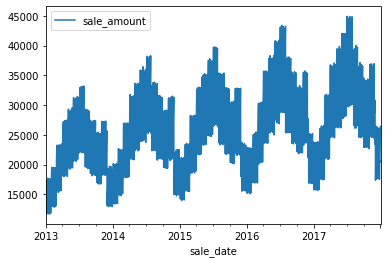

In [8]:
# Chart out the sum of the sales_amounts by each day
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

## Let's get to know our data a bit better

* Currently, the dataframe has one row per sold item, but what if we need more or less granularity?
* Let's get to know our data then consider what it means to define our observation in different ways.
* We'll also look at different time-windows for our data.

### Plot Target Variable Over Time

Generate a quick plot of our target variable over time, the variable we wish to forecast or predict. We will first aggregate the sale_amount by sale_date using sum(), i.e. group by sale_date and sum the sale_amount. We will then do a quick plot of this aggregated data.

# Grouping by dates to aggregate values

## Resampling

* Resampling allows us to redefine the frequency of our data. This is changing the time-window of our focus
* Residesign the frequency of the data

## Downsampling

* Downsampling means to redefine our data to have more datapoints than the original
* Creates more datapoints than the original
* If our original data is daily, but we resample to hourly, it's downsample
* One example of why we may do this is to merge less granular data with more granular data.
* We will need to handle NaNs introduced by downsampling
* We'll likely use `.ffill` or `bfill` to handle the nulls introduced by downsampling. `.ffill` means "forward fill", to replace a null with the last good value.


In [9]:
downsampling_example = df.groupby("sale_date").sale_amount.sum().asfreq("12H")
downsampling_example.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [10]:
downsampling_example.ffill().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

## Upsampling

* Upsampling means to create fewer datapoints than the original
* If we take hourly data and resample to daily, then we're "upsampling"
* With upsampling, we lose granulirity
* It's critical to use the .resample function when upsampling.


In [11]:
# Upsampling without using .resample is destructive. This DROPS DATA AND IS BAD NEWS!
df.groupby("sale_date").sale_amount.sum().asfreq("W").head()

sale_date
2013-01-06 00:00:00+00:00    17291.0
2013-01-13 00:00:00+00:00    17741.0
2013-01-20 00:00:00+00:00    17612.0
2013-01-27 00:00:00+00:00    17579.0
2013-02-03 00:00:00+00:00    19544.0
Freq: W-SUN, Name: sale_amount, dtype: float64

In [12]:
# Notice how the sum of all sales on this one specific day matches the .asfreq above when we don't use .resample?
# This is why we need .resample when upsampling
df.loc["2013-01-06"].sale_amount.sum()

17291.0

In [13]:
# When we .resample by the week, we provide an aggregate function to aggregate all of the granular data
# .resample applies the aggregate function to all the datapoints in the time frame to produce the appropriate answer.
df.sale_amount.resample("W").sum().head()

sale_date
2013-01-06 00:00:00+00:00     91067.0
2013-01-13 00:00:00+00:00    103902.0
2013-01-20 00:00:00+00:00    102950.0
2013-01-27 00:00:00+00:00    103298.0
2013-02-03 00:00:00+00:00    109027.0
Freq: W-SUN, Name: sale_amount, dtype: float64

In [14]:
# Upsample by month and aggregate by sum to show the sum of sales in by month
df.sale_amount.resample("M").sum().head()

sale_date
2013-01-31 00:00:00+00:00    454904.0
2013-02-28 00:00:00+00:00    459417.0
2013-03-31 00:00:00+00:00    617382.0
2013-04-30 00:00:00+00:00    682274.0
2013-05-31 00:00:00+00:00    763242.0
Freq: M, Name: sale_amount, dtype: float64

In [15]:
# Show rows for the summer months of 2015
# Group by store_id, upsample by month, and aggregate by count to produce the number of rows per month
df.loc["2015-06":"2015-08"].groupby("store").sale_amount.resample("M").count().head(7)

store  sale_date                
1      2015-06-30 00:00:00+00:00    1500
       2015-07-31 00:00:00+00:00    1550
       2015-08-31 00:00:00+00:00    1550
2      2015-06-30 00:00:00+00:00    1500
       2015-07-31 00:00:00+00:00    1550
       2015-08-31 00:00:00+00:00    1550
3      2015-06-30 00:00:00+00:00    1500
Name: sale_amount, dtype: int64

In [16]:
# Upsample to show the sum of sales amounts by year
df.sale_amount.resample("Y").sum()

sale_date
2013-12-31 00:00:00+00:00     7941243.0
2014-12-31 00:00:00+00:00     9135482.0
2015-12-31 00:00:00+00:00     9536887.0
2016-12-31 00:00:00+00:00    10357160.0
2017-12-31 00:00:00+00:00    10733740.0
Freq: A-DEC, Name: sale_amount, dtype: float64

## Check for time gaps in the data

* While there may not be nulls present, the time observations may leave a gap that we need to be able to detect!
* Let's check the number of rows vs. the number of timedeltas that may exist between the datetime min and max.
* This will check for any gaps in the time data that we may need to handle.
* Our algorithm to check for number of timedeltas is df.index.max() - df.index.min() + 1 unit of the observation (day in this case)


In [17]:
print(f"Number of rows: {df.index.nunique()}")
print(f"Number of timedeltas of a day {df.index.max() - df.index.min() + timedelta(days=1)}")

Number of rows: 1826
Number of timedeltas of a day 1826 days 00:00:00


## Handling Nulls

* There could be many sources of nulls
    * A common cause is that new rows might be written when there's activity, not every day or time period, by default
    * Older data was recorded weekly, newer data daily, and if they are in one dataframe w/ a daily index, then there will be nulls.
    * Downsampling
* Downsampling the data to have more datapoints than originally leads us to have nulls
* Downsampling may be valuable in case new data has a higher time granularity
* Either way, we'll need to handle the nulls. We have .ffill, .bfill, and our trusty fillna method
* `.ffill()` forward-fills each null with the previously good value
* `.bfill()` backfills each null with the next good null

In [18]:
# In this example of downsampling, we have daily data and downsample to 12 hour frequency
nan_example = df.groupby("sale_date").sum().asfreq("12H")[["sale_amount"]]
nan_example["ffill"] = nan_example.sale_amount.ffill()
nan_example["bfill"] = nan_example.sale_amount.bfill()
nan_example.head()

,sale_amount,ffill,bfill
sale_date,,,
2013-01-01 00:00:00+00:00,13696.0,13696.0,13696.0
2013-01-01 12:00:00+00:00,NaN,13696.0,13678.0
2013-01-02 00:00:00+00:00,13678.0,13678.0,13678.0
2013-01-02 12:00:00+00:00,NaN,13678.0,14488.0
2013-01-03 00:00:00+00:00,14488.0,14488.0,14488.0


## Rolling Windows

* Rolling windows of time allow us to add windows of time
* With different aggregation functions, we can have rolling averages, rolling counts, rolling minimums or maximums, etc...
* Rolling averages, for example, are often called "moving averages"


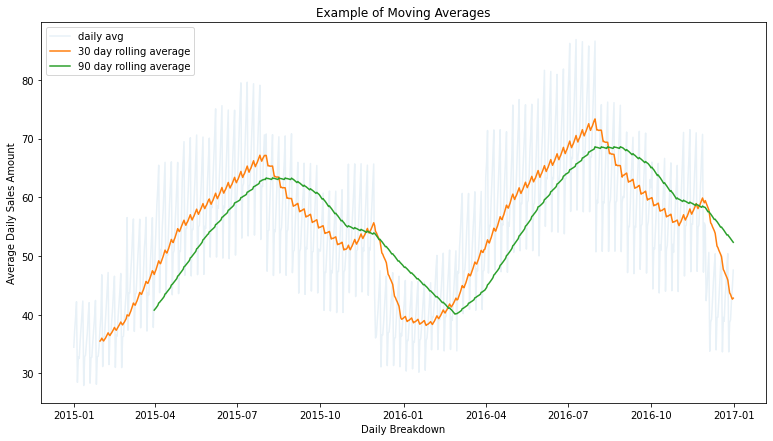

In [19]:
rolling_example = pd.DataFrame()

rolling_example["daily_average"] = df.loc["2015":"2016"].groupby("sale_date").sale_amount.mean()
rolling_example["30_day_avg"] = rolling_example.daily_average.rolling(30).mean()
rolling_example["90_day_avg"] = rolling_example.daily_average.rolling(90).mean()

plt.figure(figsize=(13, 7))
plt.title("Example of Moving Averages")
plt.xlabel("Daily Breakdown")
plt.ylabel("Average Daily Sales Amount")

# It's useful to lower the alpha/opacity to reduce the noise
plt.plot(rolling_example.index, rolling_example.daily_average, alpha=0.1)

plt.plot(rolling_example.index, rolling_example["30_day_avg"])
plt.plot(rolling_example.index, rolling_example["90_day_avg"])
plt.legend(['daily avg', '30 day rolling average','90 day rolling average'], loc='upper left')
plt.show()

## Lagging and Lead

* `.shift` moves the data backwards and forwards by a given amount shift docs
* `.diff` finds the difference with the previous observation (or a specified further back observation). diff docs

In [20]:
df["shift(-1)"] = df.sale_amount.shift(-1)
df["diff(1)"] = df.sale_amount.diff(1)
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,shift(-1),diff(1)
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,NaN
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,-2.0
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,3.0
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,-1.0
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12.0,-3.0


In [21]:
def prep_store_data(df):
    return df.asign(sale_date=pd.to_datetime(df.sale_date)).sort_values('sale_date').set_index('sale_date')

# Exploration Analysis

In [22]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare

df = prepare.wrangle_sales_data()

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')

## Split the data

There are many options for sampling or splitting time-series data in order to build an unbiased estimator (model).

Special considerations when sampling time-series data include: 

- The test sample must follow your train (in time) and cannot overlap the data that trained the model it will be used to test. 
- The test sample must be in a continous interval to maintain the aspect of the data being 'time-series'. That is, each point is not in isolation, but belongs between the points around it; therefore, it must be considered with the points around it.
- The test sample ideally will follow the training data with a time gap between the two samples. 30 days is a standard recommended gap, but this obviously depends on the problem at hand.

Ways to split time-series data: - Sample using sklearn's Time Series cross-validator - Sample using a static date cutoff - Sample using a percent split

## TimeSeriesSplit

TimeSeriesSplit provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.

This cross-validation object is a variation of KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set.

Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them.

* aggregate to the daily level (resample('D').sum())
* reset index (we need the index to represent row numbers for this method of splitting)
* set sale_amount to y
* set sale_date to X

In [23]:
df2 = df.sale_amount.resample('D').sum().reset_index()

In [24]:
X = df2.sale_date
y = df2.sale_amount

* create TimeSeriesSplit to do 5 splits with no max train size. (Create the object)
* Generate the indices for the splits using tss.split(X). (Fit to your data)
* Use those indices to select the rows to go in their respective samples. (Transform your data)

# Time Series EDA

* Time Series Train-Test Split
    * Human-based
    * Percentage Based
    * Cross Validate Splits
* 10 Awesome Time Series Visualizations to Impress Your Friends and Family
    1. Blow off the time series
    1. y over time
    1. y averaged over various periods over time
    1. y.diff() over time
    1. Seasonal Plot
    1. Seasonal Subseries Plot
    1. Lag Plot
    1. Autocorrelation Plot
    1. Seasonal Decomposition
    1. Area Plots
* Aside: working with dates in matplotlib
* Aside: strftime

## Setup

We'll be looking at temperature data for san antonio from late 2012 to late 2017.
We'll need to convert from Kelvin to Fahrenheit.
°F = (K - 273.15) x 1.8000 + 32.00

In [25]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
df.head()

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


## Train-Test Split

* Ideally all splits contain a season
* Human-based: use the last year as test
* Percentage based: use the last 20% as test
* Cross Validate: break data up into slices and use successive slices as train and test repeatedly 
`(sklearn.model_selection.TimeSeriesSplit)`

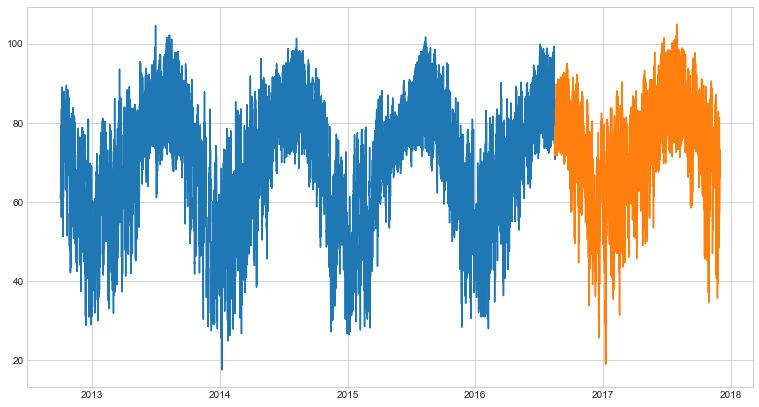

In [26]:
# Percentage-Based
train_size = .75
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

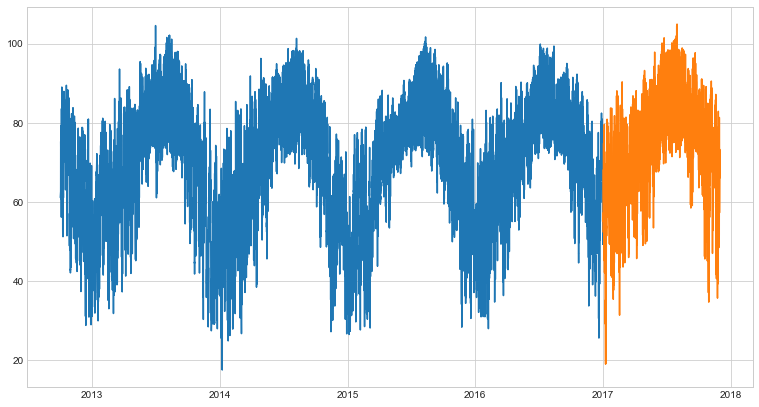

In [27]:
# Human-Based
train = df[:'2016']
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

## Visualizations

1. Blow off the time series

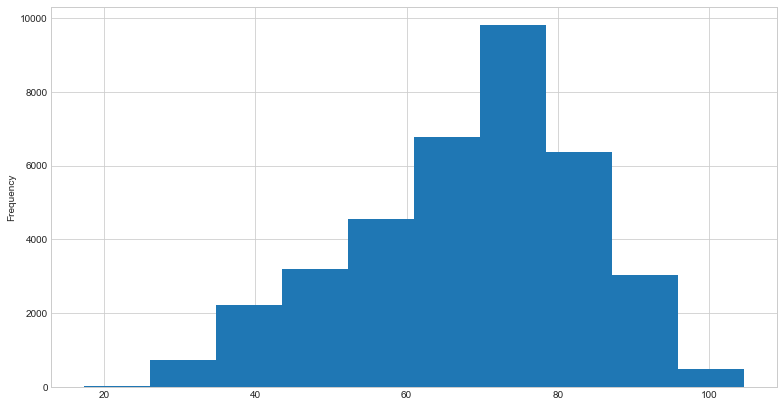

In [28]:
y = train.temp
y.plot.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

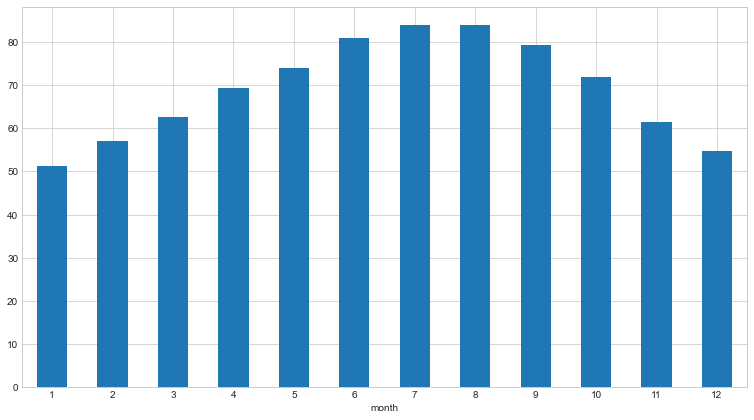

In [29]:
df["month"] = df.index.month

df.groupby("month").temp.mean().plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

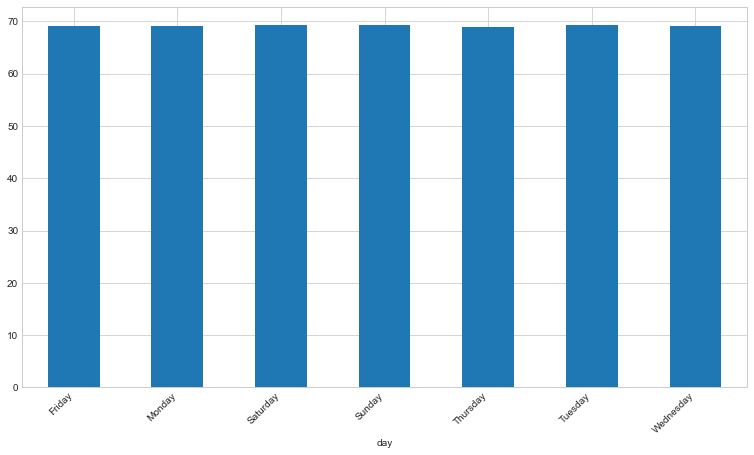

In [30]:
df["day"] = df.index.day_name()

df.groupby("day").temp.mean().plot.bar()
plt.xticks(rotation = 45, ha="right")

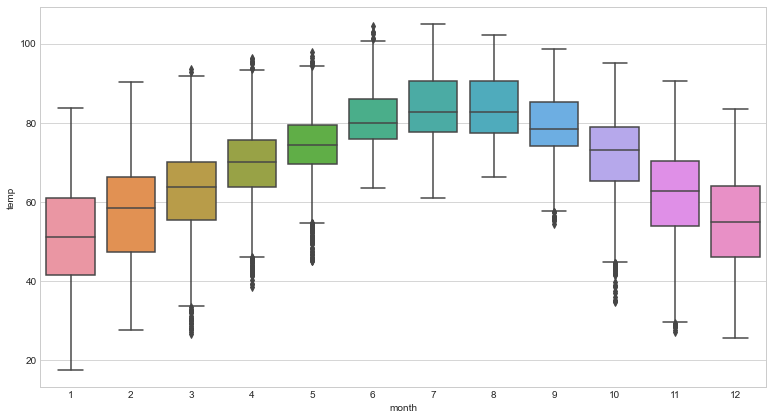

In [31]:
import seaborn as sns

sns.boxplot(data=df, y="temp", x="month")

2. y over time

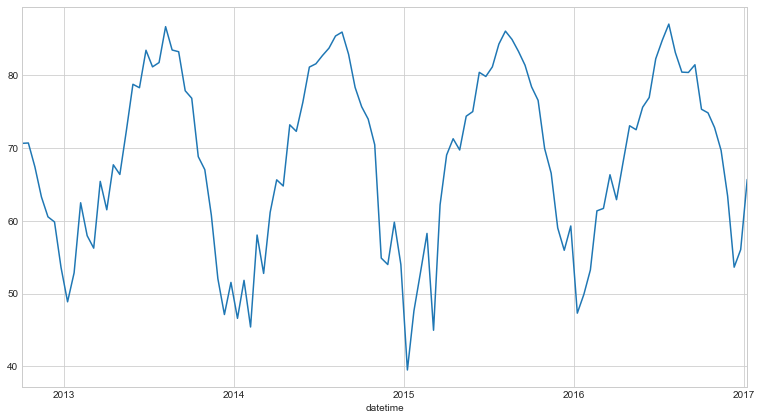

In [32]:
y.resample("2w").mean().plot()

3. y averaged over various periods over time

<function matplotlib.pyplot.legend(*args, **kwargs)>

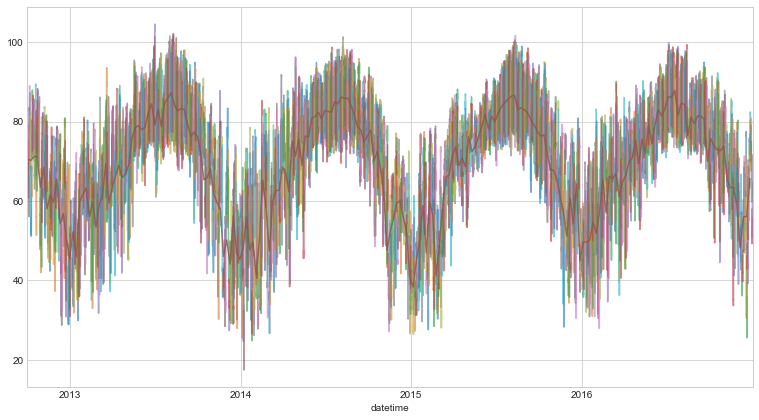

In [33]:
y.plot(alpha=.2, label="Hourly")
y.resample("D").plot(alpha=.5, label="Daily")
y.resample("W").mean().plot(alpha=.8, label="Weekly")
plt.legend

4. y.diff() over time

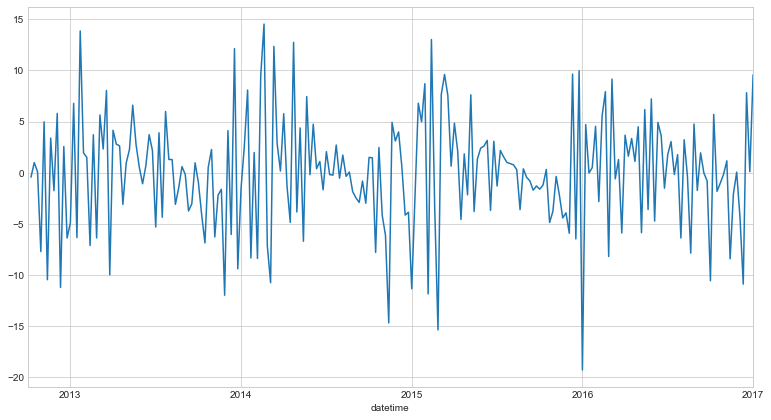

In [34]:
y.resample("W").mean().diff().plot()

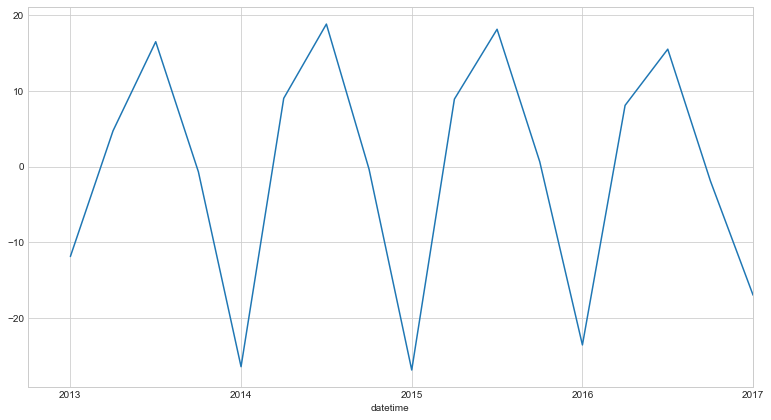

In [35]:
y.resample("3M").mean().diff().plot()

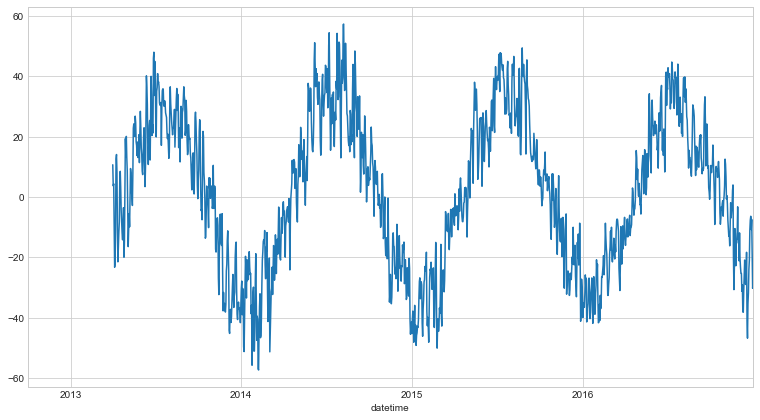

In [36]:
y.resample("D").mean().diff(182).plot()

[Text(0.5, 1.0, 'Temperature over time')]

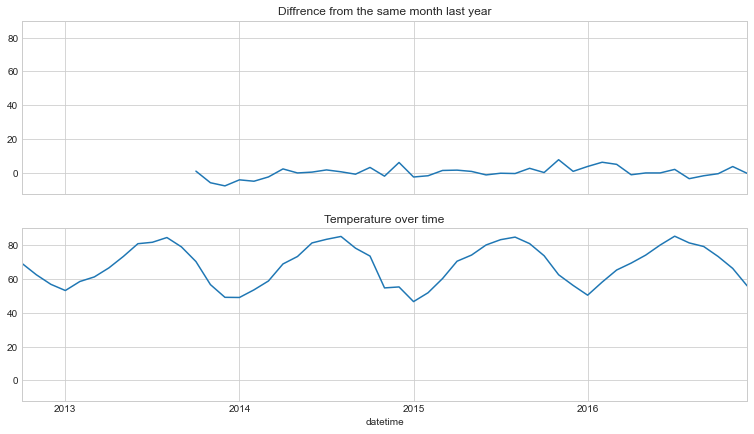

In [37]:
yfig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

ax = y.resample("M").mean().diff(12).plot(ax=ax1)
ax1.set(title="Diffrence from the same month last year")

ax = y.resample("M").mean().plot(ax=ax2)
ax2.set(title = "Temperature over time")

5. Seasonal Plot

    * SHow the month on the x axis
    * y variable on y varible
    * use hue to indicate year

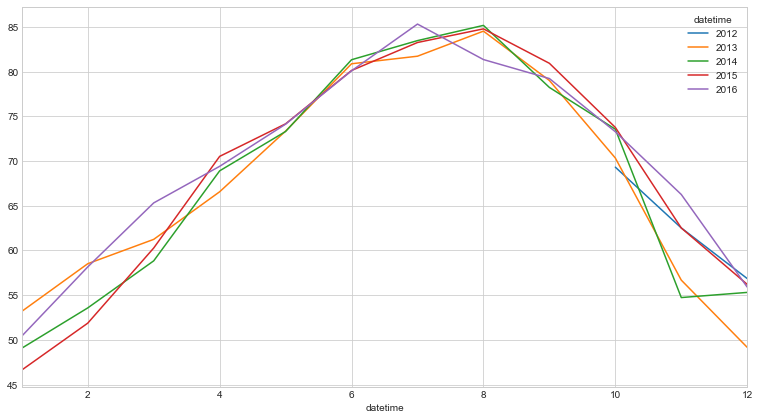

In [38]:
# .Unstack turns on index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

6. Seasonal Subseries Plot

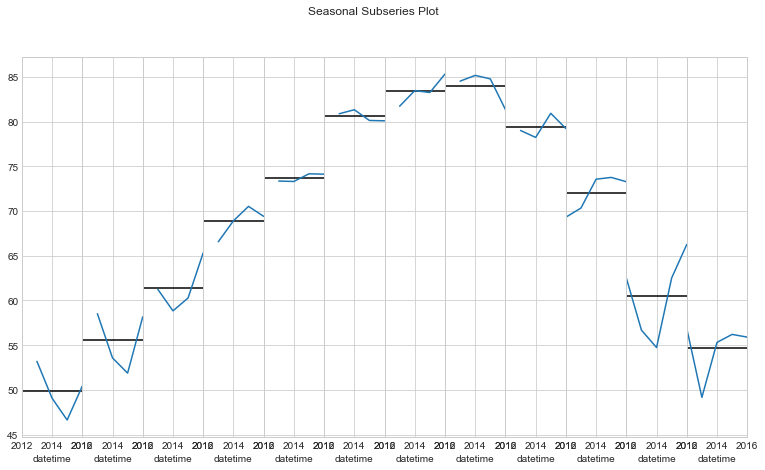

In [39]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, ax = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month,subset) in zip(ax, table.iteritems()):
    subset.plot(ax=ax)
    ax.hlines(subset.mean(), *ax.get_xlim())

fig.suptitle("Seasonal Subseries Plot")
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

7. Lag Plot

[Text(0, 0.5, 'y(t + 1)'), Text(0.5, 0, 't')]

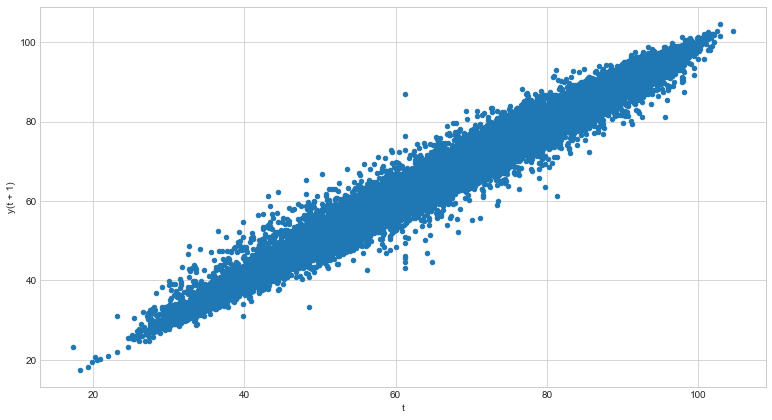

In [40]:
train["y(t + 1)"] = train.temp.shift(-1)
ax = train.plot.scatter(x="temp", y="y(t + 1)")
ax.set(xlabel="t", ylabel = "y(t + 1)")

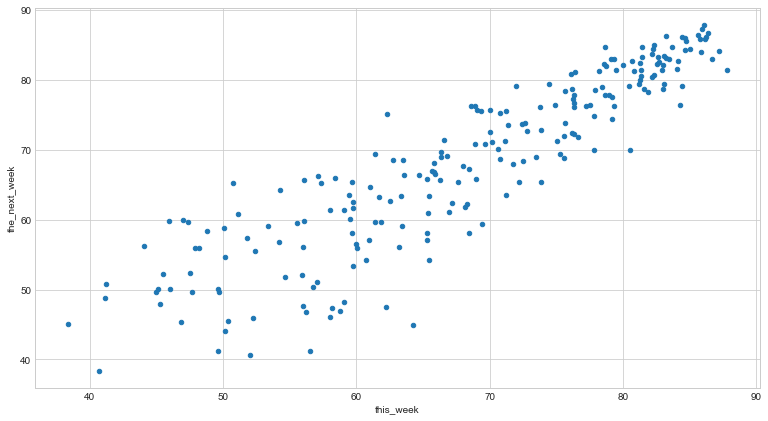

In [41]:
weekly = train.resample("W").mean().drop(columns = "y(t + 1)")
weekly["the_next_week"] = weekly.temp.shift(-1)
weekly = weekly.rename(columns=({"temp": "this_week"}))
weekly.plot.scatter(x="this_week", y = "the_next_week")

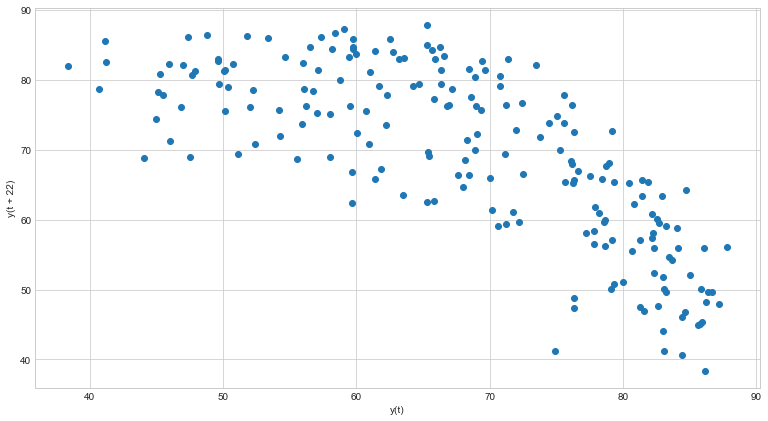

In [42]:
pd.plotting.lag_plot(train.temp.resample("W").mean(), lag=22)

8. Autocorrelation Plot

    * What is pearson' r as a function of the lag time?
    * **Autocorrelation** : How a series correlates with itself
    * Help us identify seasonality. WHen there are peaks, that can tell us the frequency of our seasonality

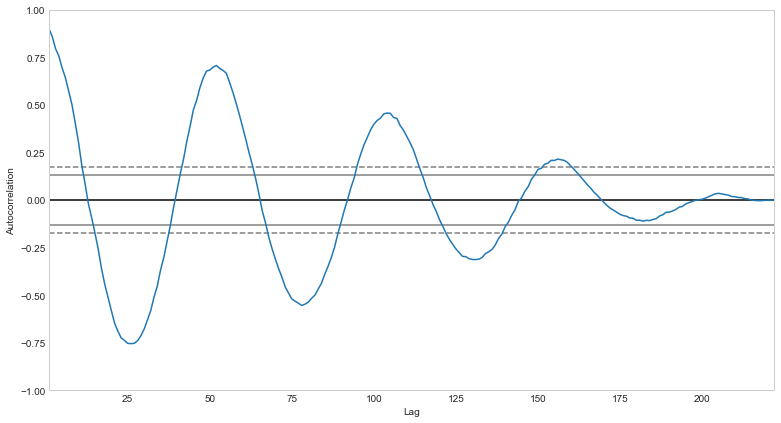

In [43]:
pd.plotting.autocorrelation_plot(train.temp.resample("W").mean())

9. Seasonal Decomposition

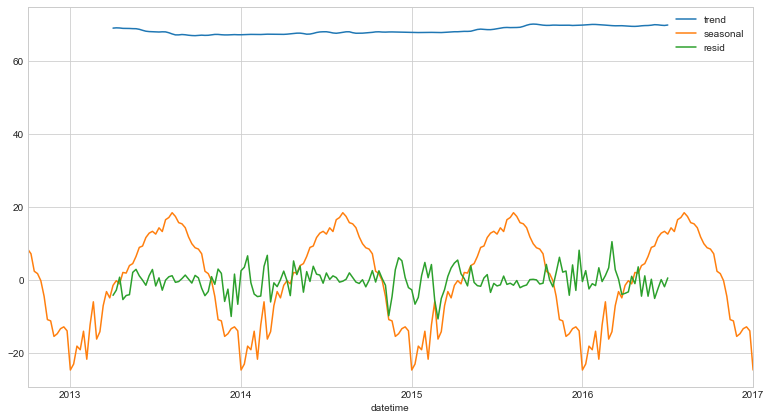

In [44]:
y = train.temp.resample("W").mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
        "y": result.observed,
    "trend": result.trend,
    "seasonal": result.seasonal,
    "resid": result.resid,
})

decomposition.iloc[:,1:].plot()

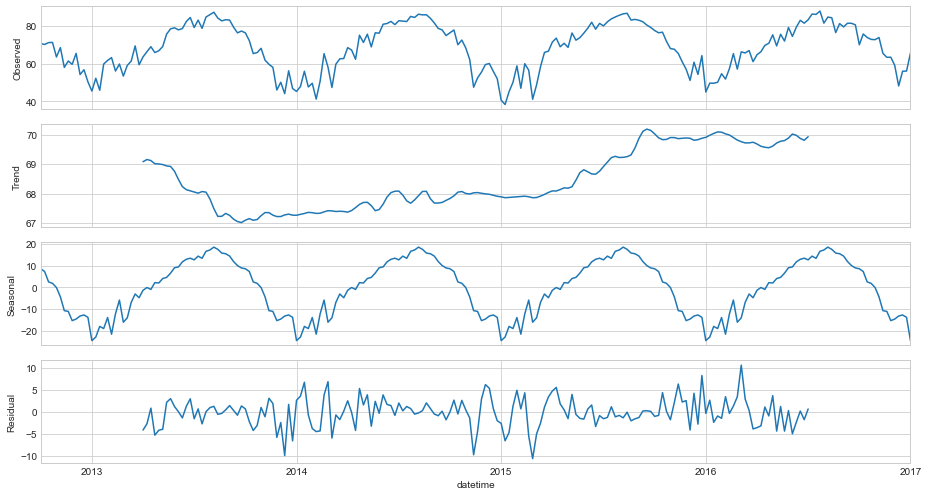

In [45]:
result.plot()
None

10. Area Plots

    - can we visualize categories over time?

In [46]:
train.drop(columns= "y(t + 1)", inplace=True)

In [47]:
train = train.resample("D").mean()

In [48]:
train["temp_bin"] = pd.qcut(train.temp, 4, labels=["cold", "cool", "warm", "hot"])

In [49]:
train.groupby("temp_bin").mean()

,temp
temp_bin,
cold,49.381699
cool,65.200219
warm,75.447977
hot,83.449087


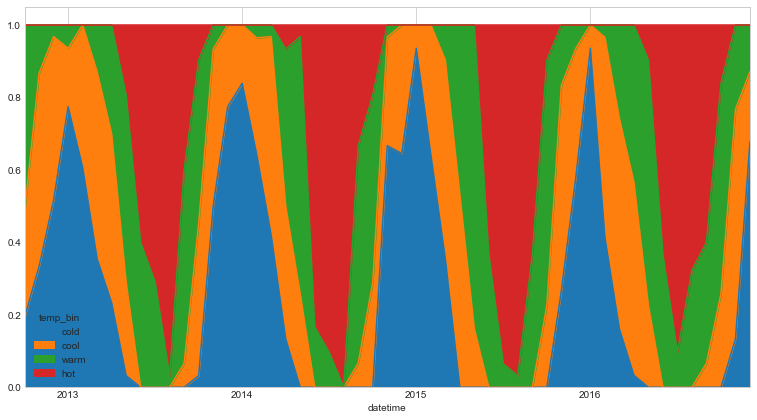

In [50]:
# How is the distribution of temp_bin changing over time?

train.groupby("temp_bin").resample("M").size().unstack(0).apply(lambda row: row/ row.sum(), axis=1).plot.area()

## strftime

Cheatsheet or man strftime

https://zach.lol/strftime.html

In [51]:
df.head(5).index.strftime('The date is %B %d, %Y and the time is %I:%M %p')

Index(['The date is October 01, 2012 and the time is 01:00 PM',
       'The date is October 01, 2012 and the time is 02:00 PM',
       'The date is October 01, 2012 and the time is 03:00 PM',
       'The date is October 01, 2012 and the time is 04:00 PM',
       'The date is October 01, 2012 and the time is 05:00 PM'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

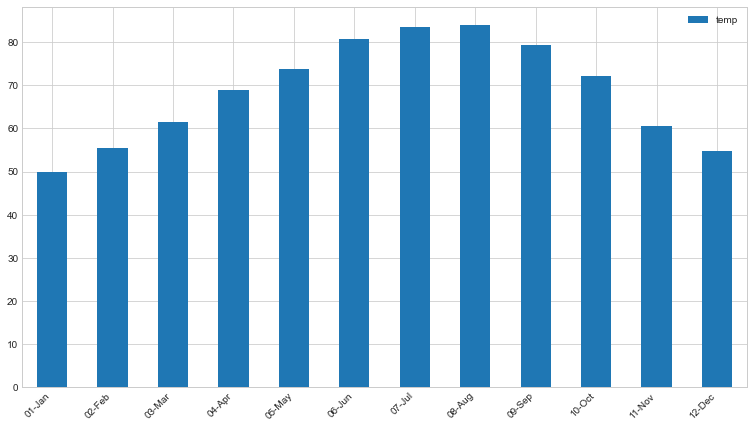

In [52]:
train.groupby(train.index.strftime("%m-%b")).mean().plot.bar()
plt.xticks(rotation=45, ha="right")

## Mayplotlib Dates

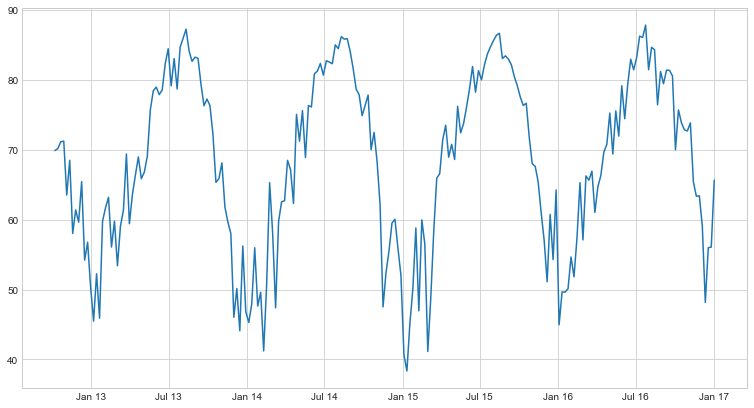

In [53]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = train.temp.resample('W').mean()

ax.plot(weekly.index, weekly)
ax.xaxis.set_major_formatter(DateFormatter('%b %y')) # we can specifiy our own custom formatting for the dates using the matplotlib dateformatter

____________

# Modeling

## Agenda

1. Acquire data: prepare.acquire_store_data()
1. Prepare data: prepare.prep_store_data()
1. Split data: prepare.split_store_data()

1.Forecast methods
    * Last observed value
    * Simple average
    * Moving average
    * Holt's Linear Trend
    * Previous cycle
    * Prophet (lesson 2)
1. Evaluate

In [63]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# get_store_data

1. If `cache = True` and the path/file to store_item_demand.csv exists, then read from the csv into a dataframe that is returned.
1. If `cache = False` or the path/file doesn't exist, then read from the mySQL tsa_item_demand database using the query indicated into a dataframe, write that dataframe to a csv for future use, and return the dataframe.

In [64]:
def get_store_data(cache=True):
    csv_file_path = './store_item_demand.csv'

    query = '''
    SELECT
        sales.*,
        items.item_brand,
        items.item_name,
        items.item_price,
        stores.store_address,
        stores.store_zipcode,
        stores.store_city,
        stores.store_state
    FROM sales
    JOIN items USING(item_id)
    JOIN stores USING(store_id)
    '''

    if cache and path.exists(csv_file_path):
        return pd.read_csv(csv_file_path)
    else:
        df = pd.read_sql(query, get_connection('tsa_item_demand'))
        df.to_csv(csv_file_path, index=False)
        return df

In [65]:
df = get_store_data()

NameError: name 'path' is not defined